##Cell 1: Importing Libraries and Setting Parameters

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Define Parameters
I_load = 20            # Constant Current Load (Amps)
V_nom = 3.6            # Nominal Voltage (Volts)
Wh_range = np.arange(12, 20.1, 0.1)     # Capacity range (Wh)
R_range = np.arange(0.004, 0.0405, 0.0005) # DCIR range (Ohms)

# Thermal Parameters
m_cell = 0.071         # Mass (kg) -> 71g
c_p = 900              # Specific Heat Capacity (J/kg*K)
T_ambient = 25         # Starting Ambient Temp (deg C)

# 2. Create Grid & Calculate Physics
R_grid, Wh_grid = np.meshgrid(R_range, Wh_range)

# A. Runtime Calculation (Hours)
t_run_hours = Wh_grid / (V_nom * I_load)

# B. Energy Loss Calculation (Resistive Heating)
P_loss = (I_load**2) * R_grid       # Watts
E_loss_Wh = P_loss * t_run_hours    # Watt-Hours lost to heat

# C. Usable Energy Calculation
E_usable = Wh_grid - E_loss_Wh

# D. Thermal Calculation (Temperature Rise)
Q_joules = E_loss_Wh * 3600
Delta_T = Q_joules / (m_cell * c_p)
T_final = T_ambient + Delta_T

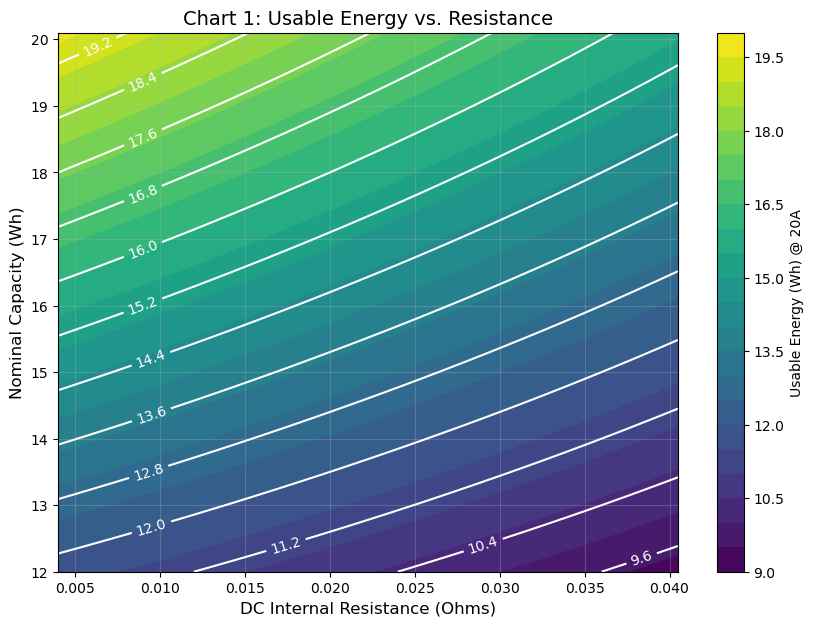

In [8]:
##Cell 2: Plot 1 - Usable Energy
plt.figure(figsize=(10, 7))
cp = plt.contourf(R_grid, Wh_grid, E_usable, 20, cmap='viridis')
cbar = plt.colorbar(cp)
cbar.set_label(f'Usable Energy (Wh) @ {I_load}A')

# Lines of Equivalency
lines = plt.contour(R_grid, Wh_grid, E_usable, 15, colors='white', linewidths=1.5)
plt.clabel(lines, inline=True, fontsize=10, fmt='%1.1f')

plt.title('Chart 1: Usable Energy vs. Resistance', fontsize=14)
plt.xlabel('DC Internal Resistance (Ohms)', fontsize=12)
plt.ylabel('Nominal Capacity (Wh)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

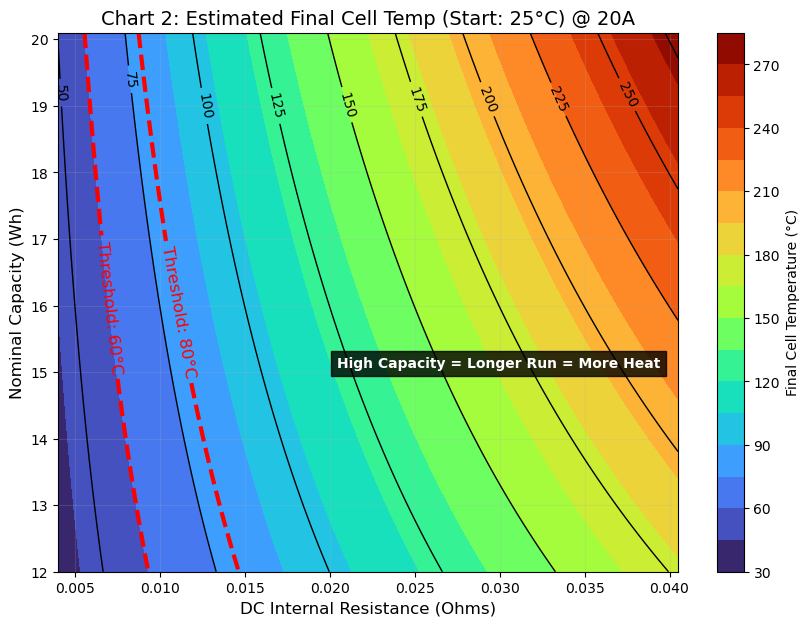

In [19]:
plt.figure(figsize=(10, 7))

# Contour Plot using 'turbo' or 'inferno' to highlight heat
cp2 = plt.contourf(R_grid, Wh_grid, T_final, 20, cmap='turbo')
cbar2 = plt.colorbar(cp2)
cbar2.set_label('Final Cell Temperature (°C)')

# Lines of Constant Temperature
lines2 = plt.contour(R_grid, Wh_grid, T_final, 10, colors='black', linewidths=1)
plt.clabel(lines2, inline=True, fontsize=10, fmt='%d')

# Safety Threshold Lines (60C and 80C)
safe_lines = plt.contour(R_grid, Wh_grid, T_final, levels=[60, 80], colors='red', linestyles='--', linewidths=3)
plt.clabel(safe_lines, inline=True, fontsize=12, fmt='Threshold: %d°C')

plt.title(f'Chart 2: Estimated Final Cell Temp (Start: {T_ambient}°C) @ {I_load}A', fontsize=14)
plt.xlabel('DC Internal Resistance (Ohms)', fontsize=12)
plt.ylabel('Nominal Capacity (Wh)', fontsize=12)

# Annotation similar to the MATLAB text() function
plt.text(R_range.min()*5.1, Wh_range.max()*0.75, 'High Capacity = Longer Run = More Heat', 
         color='white', fontweight='bold', bbox=dict(facecolor='black', alpha=0.8))

plt.grid(True, alpha=0.2)
plt.show()

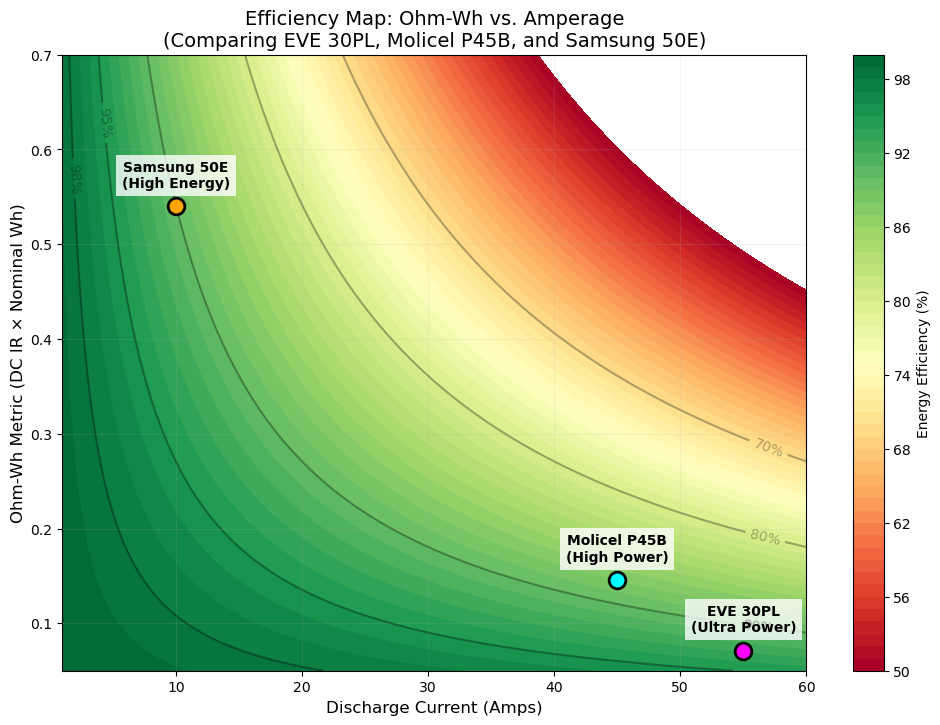

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Define Cell Profiles (DC IR values)
# Molicel P45B
p45b_wh = 16.2
p45b_dc_ir = 0.009
p45b_ohm_wh = p45b_dc_ir * p45b_wh

# Samsung 50E
s50e_wh = 18.0
s50e_dc_ir = 0.030
s50e_ohm_wh = s50e_dc_ir * s50e_wh

# EVE 30PL (New)
eve30pl_wh = 10.95
eve30pl_dc_ir = 0.0065
eve30pl_ohm_wh = eve30pl_dc_ir * eve30pl_wh

# 2. Setup the Grid
amps = np.linspace(1, 60, 200) # Extended to 60A
ohm_wh_range = np.linspace(0.05, 0.7, 200) # Focused on the 0.05 to 0.7 range
A_grid, OW_grid = np.meshgrid(amps, ohm_wh_range)

# 3. Efficiency Calculation
V_nom = 3.6
# Reference Energy (average of the group) to anchor the efficiency gradient
Wh_ref = (p45b_wh + s50e_wh + eve30pl_wh) / 3 
efficiency = 1 - (A_grid * (OW_grid / Wh_ref)) / V_nom
efficiency = np.clip(efficiency, 0, 1)

# 4. Plotting
plt.figure(figsize=(12, 8))
cp = plt.contourf(A_grid, OW_grid, efficiency * 100, levels=np.arange(50, 101, 1), cmap='RdYlGn')
cbar = plt.colorbar(cp)
cbar.set_label('Energy Efficiency (%)')

# Add threshold lines
lines = plt.contour(A_grid, OW_grid, efficiency * 100, levels=[70, 80, 90, 95, 98], colors='black', alpha=0.3)
plt.clabel(lines, inline=True, fontsize=10, fmt='%d%%')

# Plot Cell Markers
# Samsung 50E at 10A
plt.plot(10, s50e_ohm_wh, 'ko', markersize=12, markerfacecolor='orange', markeredgewidth=2)
plt.text(10, s50e_ohm_wh + 0.02, 'Samsung 50E\n(High Energy)', fontweight='bold', ha='center', 
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

# Molicel P45B at 45A
plt.plot(45, p45b_ohm_wh, 'ko', markersize=12, markerfacecolor='cyan', markeredgewidth=2)
plt.text(45, p45b_ohm_wh + 0.02, 'Molicel P45B\n(High Power)', fontweight='bold', ha='center', 
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

# EVE 30PL at 55A
plt.plot(55, eve30pl_ohm_wh, 'ko', markersize=12, markerfacecolor='magenta', markeredgewidth=2)
plt.text(55, eve30pl_ohm_wh + 0.02, 'EVE 30PL\n(Ultra Power)', fontweight='bold', ha='center', 
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

plt.title('Efficiency Map: Ohm-Wh vs. Amperage\n(Comparing EVE 30PL, Molicel P45B, and Samsung 50E)', fontsize=14)
plt.xlabel('Discharge Current (Amps)', fontsize=12)
plt.ylabel('Ohm-Wh Metric (DC IR × Nominal Wh)', fontsize=12)
plt.grid(True, alpha=0.15)
plt.show()

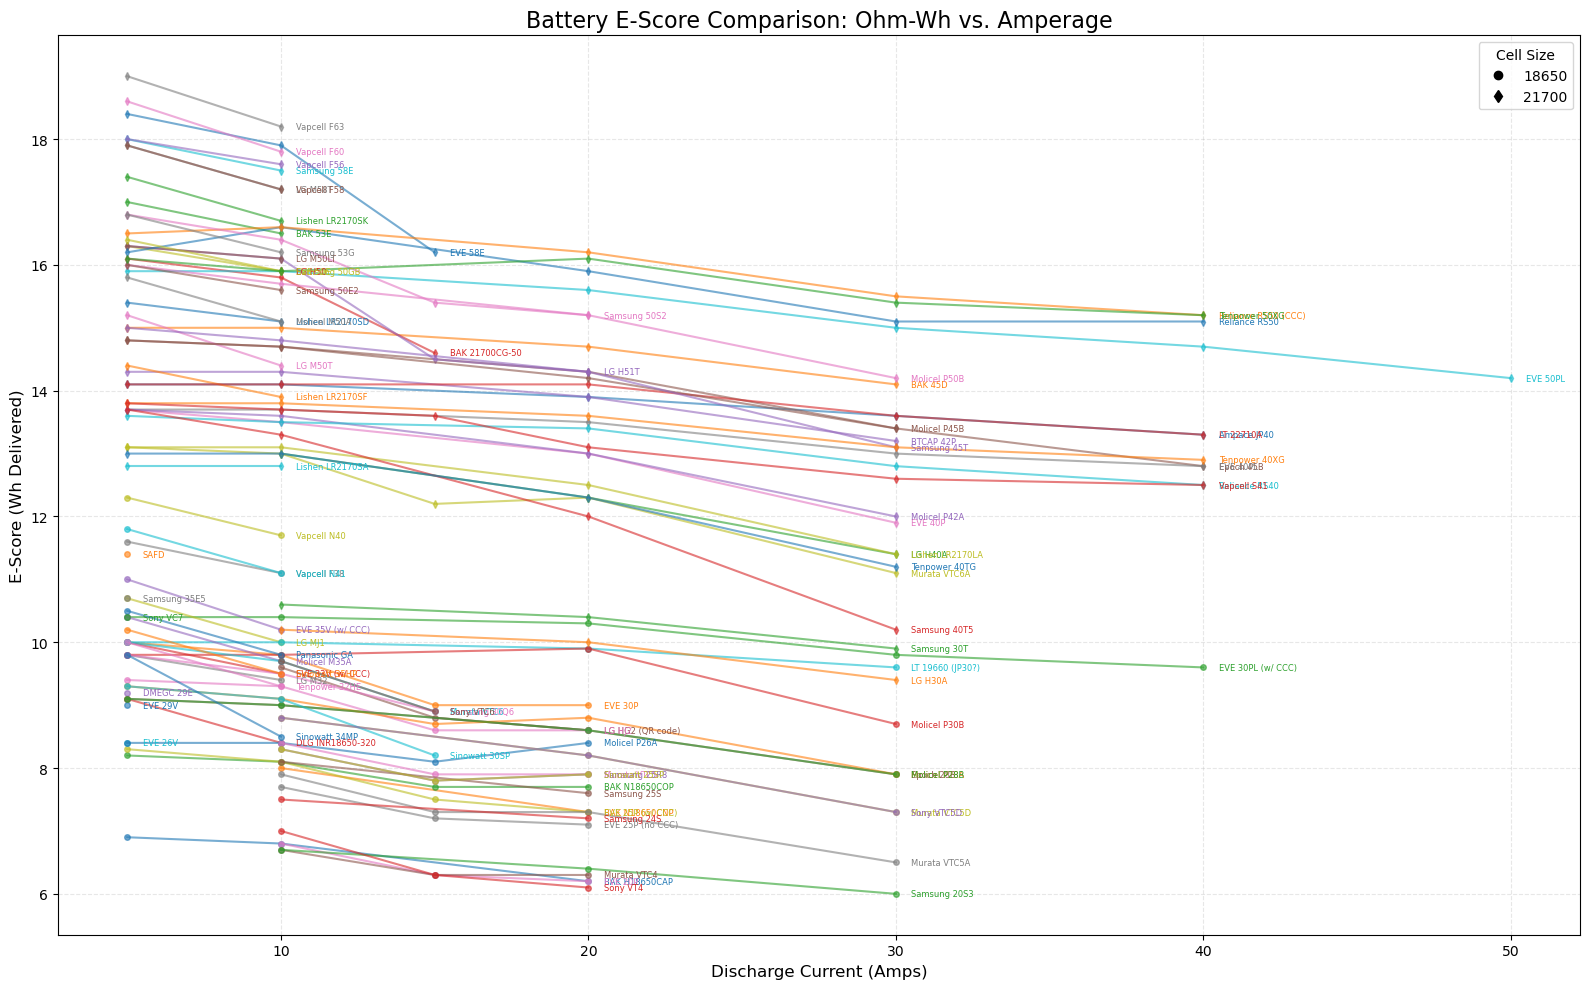

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. Load the data
df = pd.read_csv(r'C:\Pythoning\Data\MoochBatteryDataV1.csv')

# 2. Setup the plot
plt.figure(figsize=(16, 10))
ax = plt.gca()

# Amperage columns to plot (X-axis values)
amp_levels = [5, 10, 15, 20, 30, 40, 50]
amp_cols = ['E-Score 5A', 'E-Score 10A', 'E-Score 15A', 'E-Score 20A', 'E-Score 30A', 'E-Score 40A', 'E-Score 50A']

# Define markers for cell sizes
# 18650 = Circle (o), 21700 = Diamond (d)
marker_map = {18650: 'o', 21700: 'd'}

# 3. Plot each battery
for i, row in df.iterrows():
    # Filter out empty scores for this specific row
    valid_amps = []
    valid_scores = []
    
    for amp, col in zip(amp_levels, amp_cols):
        if pd.notnull(row[col]) and row[col] != '—':
            valid_amps.append(amp)
            valid_scores.append(float(row[col]))
    
    if not valid_amps:
        continue

    # Get cell properties
    size = int(row['Cell Size'])
    marker = marker_map.get(size, 'x')
    ohm_wh = row['Ohm-Wh']
    name = row['Battery Model']

    # Plot line and points
    line, = plt.plot(valid_amps, valid_scores, linestyle='-', marker=marker, 
                     markersize=4, alpha=0.6, label=name)
    
    # Add small label at the end of the line
    plt.text(valid_amps[-1] + 0.5, valid_scores[-1], name, 
             fontsize=6, verticalalignment='center', color=line.get_color())

# 4. Formatting
plt.title('Battery E-Score Comparison: Ohm-Wh vs. Amperage', fontsize=16)
plt.xlabel('Discharge Current (Amps)', fontsize=12)
plt.ylabel('E-Score (Wh Delivered)', fontsize=12)

# Create a custom legend for cell sizes
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='k', label='18650', linestyle='None'),
                   Line2D([0], [0], marker='d', color='k', label='21700', linestyle='None')]
ax.legend(handles=legend_elements, loc='upper right', title="Cell Size")

plt.grid(True, which='both', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

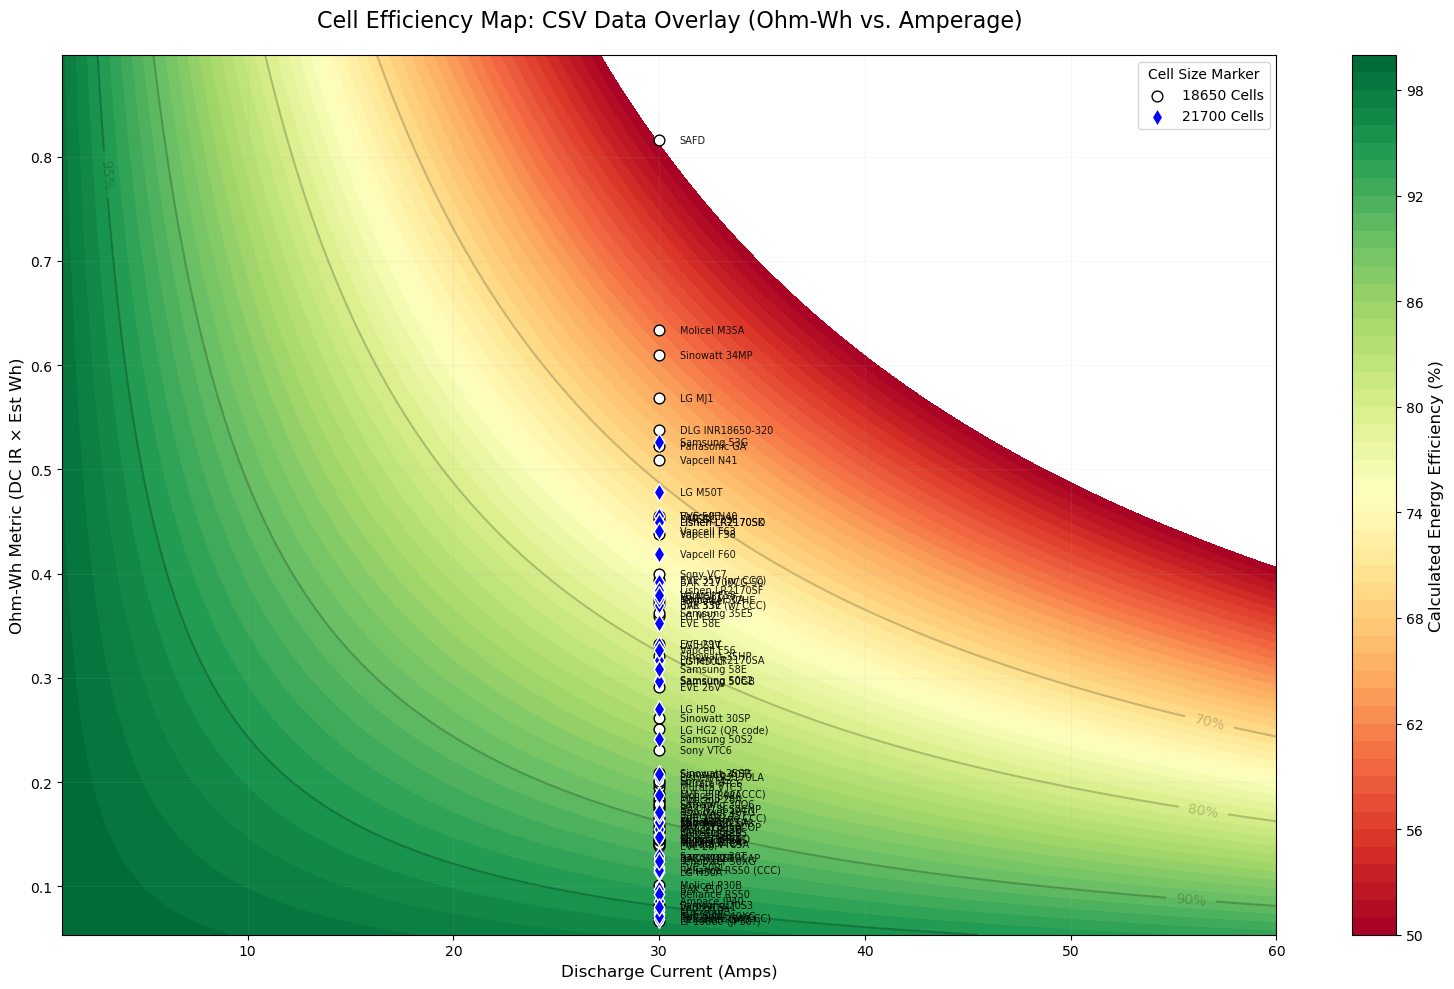

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Load your dataset
df = pd.read_csv(r'C:\Pythoning\Data\MoochBatteryDataV1.csv')

# 2. Setup the Plotting "Terrain" (Efficiency Gradient)
amps = np.linspace(1, 60, 200)
ohm_wh_range = np.linspace(df['Ohm-Wh'].min() * 0.8, df['Ohm-Wh'].max() * 1.1, 200)
A_grid, OW_grid = np.meshgrid(amps, ohm_wh_range)

# Physics: Efficiency = 1 - (I * R / V_nom)
# Substituting R = OhmWh / Wh_nom
V_nom = 3.6
Wh_ref = df['Est WH'].mean()  # Anchor the background to the average energy of your set
efficiency = 1 - (A_grid * (OW_grid / Wh_ref)) / V_nom
efficiency = np.clip(efficiency, 0, 1)

# 3. Create the Map
plt.figure(figsize=(16, 10))
cp = plt.contourf(A_grid, OW_grid, efficiency * 100, levels=np.arange(50, 101, 1), cmap='RdYlGn')
cbar = plt.colorbar(cp)
cbar.set_label('Calculated Energy Efficiency (%)', fontsize=12)

# Add threshold lines for 70%, 80%, 90%, 95%
lines = plt.contour(A_grid, OW_grid, efficiency * 100, levels=[70, 80, 90, 95], colors='black', alpha=0.2)
plt.clabel(lines, inline=True, fontsize=10, fmt='%d%%')

# 4. Overlay your CSV Data
# We plot the cells at a 30A "Reference Current" to show where they sit on the efficiency curve
ref_current = 30 

# Split by size for different markers
df_18650 = df[df['Cell Size'] == 18650]
df_21700 = df[df['Cell Size'] == 21700]

# Plot 18650s as Circles
plt.scatter([ref_current] * len(df_18650), df_18650['Ohm-Wh'], 
            color='white', edgecolor='black', marker='o', s=60, label='18650 Cells', zorder=5)

# Plot 21700s as Diamonds
plt.scatter([ref_current] * len(df_21700), df_21700['Ohm-Wh'], 
            color='blue', edgecolor='white', marker='d', s=80, label='21700 Cells', zorder=5)

# 5. Add Small Labels
for i, row in df.iterrows():
    plt.text(ref_current + 1, row['Ohm-Wh'], row['Battery Model'], 
             fontsize=7, verticalalignment='center', alpha=0.9)

plt.title('Cell Efficiency Map: CSV Data Overlay (Ohm-Wh vs. Amperage)', fontsize=16, pad=20)
plt.xlabel('Discharge Current (Amps)', fontsize=12)
plt.ylabel('Ohm-Wh Metric (DC IR × Est Wh)', fontsize=12)
plt.legend(loc='upper right', title="Cell Size Marker")
plt.grid(True, alpha=0.1)

plt.tight_layout()
plt.show()

ValueError: unsupported format character 'T' (0x54) at index 4

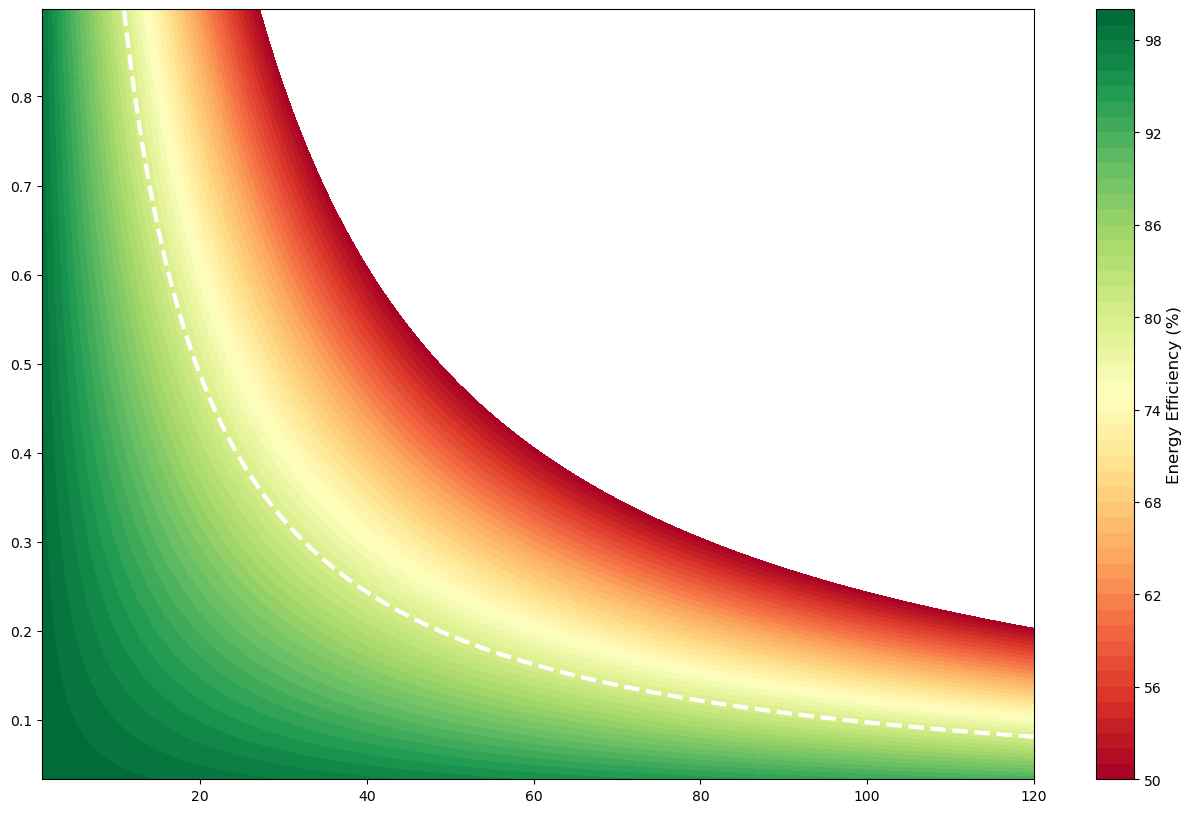

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Load the data once with space-skipping
df = pd.read_csv(r'C:\Pythoning\Data\MoochBatteryDataV1.csv', skipinitialspace=True)

# 2. Force clean column names to fix KeyErrors
df.columns = df.columns.str.strip()

# 3. Setup Plotting Terrain (Efficiency Gradient)
amps = np.linspace(1, 120, 300) 
ohm_wh_range = np.linspace(df['Ohm-Wh'].min() * 0.5, df['Ohm-Wh'].max() * 1.1, 300)
A_grid, OW_grid = np.meshgrid(amps, ohm_wh_range)

# Physics Setup: Efficiency = 1 - (I * R / V_nom)
V_nom = 3.6
Wh_ref = df['Est WH'].mean() 
efficiency = 1 - (A_grid * (OW_grid / Wh_ref)) / V_nom
efficiency = np.clip(efficiency, 0, 1)

# 4. Create the Map
plt.figure(figsize=(16, 10))
cp = plt.contourf(A_grid, OW_grid, efficiency * 100, levels=np.arange(50, 101, 1), cmap='RdYlGn')
cbar = plt.colorbar(cp)
cbar.set_label('Energy Efficiency (%)', fontsize=12)

# Bold 80% Efficiency Line
lines = plt.contour(A_grid, OW_grid, efficiency * 100, levels=[80], colors='white', linewidths=3, linestyles='--')
plt.clabel(lines, inline=True, fontsize=12, fmt='80% Target')

# 5. Plotting Individual Cell Limits
for i, row in df.iterrows():
    # Attempt to find the resistance column regardless of mohn/mohm typo
    col_name = 'DC IR (mohn)' if 'DC IR (mohn)' in df.columns else 'DC IR (mohm)'
    r_dc = row[col_name] / 1000
    
    # Calculate I at exactly 80% Efficiency (0.72V sag)
    # I = (0.2 * V_nom) / R
    i_limit = (0.2 * V_nom) / r_dc
    
    # Identify size and marker
    size = int(row['Cell Size'])
    marker = 'o' if size == 18650 else 'd'
    color = 'white' if size == 18650 else 'blue'
    
    # Plot cells on the 80% line
    plt.scatter(i_limit, row['Ohm-Wh'], color=color, edgecolor='black', 
                marker=marker, s=80, zorder=10)
    
    # Labels with calculated Amp limits
    plt.text(i_limit + 1.5, row['Ohm-Wh'], f"{row['Battery Model']} ({i_limit:.1f}A)", 
             fontsize=7, verticalalignment='center', alpha=0.8)

# 6. Formatting
plt.title('Cell Promotion/Demotion: Maximum Current for 80% Efficiency', fontsize=16, pad=20)
plt.xlabel('Calculated Safe Amperage Limit (Amps)', fontsize=12)
plt.ylabel('Ohm-Wh Metric (DC IR × Est Wh)', fontsize=12)

# Custom Legend
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='k', label='18650 (Circle)', markerfacecolor='white', linestyle='None'),
    Line2D([0], [0], marker='d', color='k', label='21700 (Diamond)', markerfacecolor='blue', linestyle='None'),
    Line2D([0], [0], color='white', lw=2, linestyle='--', label='80% Efficiency Boundary')
]
plt.legend(handles=legend_elements, loc='upper right')

plt.grid(True, alpha=0.1)
plt.tight_layout()
plt.show()